In [65]:
# Importing libraries 
import html
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
import numpy as np

In [3]:
# load facebook dataset: Australian cosmetics company page
df = pd.read_csv("https://raw.githubusercontent.com/multidis/hult-social-media-analytics/main/data/brand_posts.csv")
df

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments
0,2012-06-20 15:12:38,"Ummm, yum! What would be in your ULTIMATE naug...",photo,Australis Cosmetics with Evalyn McGregor-Koch ...,715,47,46,0.0,0.0,0.0,0.0,0.0,that looks awesome Icecream with crushed oreo....
1,2012-06-21 15:09:46,Click 'like' if you worry about that too! <3 <3,photo,NaN,1103,8,80,0.0,0.0,0.0,0.0,0.0,:\ true. i agree I just moved and I am particu...
2,2012-06-22 10:41:36,Seems like some celebs can get away with any h...,photo,NaN,161,12,2,0.0,0.0,0.0,0.0,0.0,blonde her eye colour is different Way better ...
3,2012-06-22 15:37:04,We absolutely adore our bling here at Australi...,photo,NaN,30,0,0,0.0,0.0,0.0,0.0,0.0,NaN
4,2012-06-25 10:26:10,You know you want to... :P,photo,Australis Cosmetics with Evalyn McGregor-Koch ...,117,0,6,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,2017-01-08 17:00:00,Are you a porcelain princess who just can�t fi...,photo,NaN,150,70,4,11.0,0.0,0.0,0.0,1.0,Yes but I also have such an intense red tone i...
2040,2017-01-09 19:30:00,Blend Velourlips NY-Cee and Doo-Bai to achieve...,photo,NaN,35,1,0,0.0,0.0,0.0,0.0,0.0,She looked gorgeous <ed><U+00A0><U+00BD><ed><U...
2041,2017-01-10 09:30:00,FREE brush alert! To help you start the year w...,photo,NaN,40,4,1,0.0,0.0,1.0,0.0,0.0,I have this and it's honestly the best brush e...
2042,2017-01-15 16:30:00,Add some glow to your look with the High Life ...,photo,NaN,24,2,1,1.0,0.0,0.0,0.0,0.0,These are the best! But bring back the pan sti...


In [22]:
# keywords occurring throughout all of the posts: clean up the text first
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
# Substitute the word <ed> with space ' ' to clean up better the text
def text_cleanup(s):
    # if not a string object, disregard
    if not isinstance(s, str):
        return ''
    
    s_unesc = html.unescape(re.sub('<ed>', ' ', re.sub(r"http\S+", "", re.sub('\n+', ' ', s))))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [23]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df['message_clean'] = df['message'].apply(text_cleanup)
df

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
0,2012-06-20 15:12:38,"Ummm, yum! What would be in your ULTIMATE naug...",photo,Australis Cosmetics with Evalyn McGregor-Koch ...,715,47,46,0.0,0.0,0.0,0.0,0.0,that looks awesome Icecream with crushed oreo....,ummm yum would ultimate naughty treat
1,2012-06-21 15:09:46,Click 'like' if you worry about that too! <3 <3,photo,NaN,1103,8,80,0.0,0.0,0.0,0.0,0.0,:\ true. i agree I just moved and I am particu...,click worry 3 3
2,2012-06-22 10:41:36,Seems like some celebs can get away with any h...,photo,NaN,161,12,2,0.0,0.0,0.0,0.0,0.0,blonde her eye colour is different Way better ...,seems like celebs get away hair colour check n...
3,2012-06-22 15:37:04,We absolutely adore our bling here at Australi...,photo,NaN,30,0,0,0.0,0.0,0.0,0.0,0.0,NaN,absolutely adore bling australis hq nothing ma...
4,2012-06-25 10:26:10,You know you want to... :P,photo,Australis Cosmetics with Evalyn McGregor-Koch ...,117,0,6,0.0,0.0,0.0,0.0,0.0,NaN,know want p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,2017-01-08 17:00:00,Are you a porcelain princess who just can�t fi...,photo,NaN,150,70,4,11.0,0.0,0.0,0.0,1.0,Yes but I also have such an intense red tone i...,porcelain princess cant find foundation light ...
2040,2017-01-09 19:30:00,Blend Velourlips NY-Cee and Doo-Bai to achieve...,photo,NaN,35,1,0,0.0,0.0,0.0,0.0,0.0,She looked gorgeous <ed><U+00A0><U+00BD><ed><U...,blend velourlips achieve perfect bold lip insp...
2041,2017-01-10 09:30:00,FREE brush alert! To help you start the year w...,photo,NaN,40,4,1,0.0,0.0,1.0,0.0,0.0,I have this and it's honestly the best brush e...,free brush alert help start year flawless face...
2042,2017-01-15 16:30:00,Add some glow to your look with the High Life ...,photo,NaN,24,2,1,1.0,0.0,0.0,0.0,0.0,These are the best! But bring back the pan sti...,add glow look high life highlighting powder tr...


In [25]:
#Validation of replacement of <ed>
df['message'].str.contains('<ed>')
df['message_clean'][2043]

'last chance double ended contouring blending tool free order 60 made via website valued get brush free simply entering code acflawless checkout hurry miss goody shop online'

In [26]:
# Question 1
df["type"].unique()

array(['photo', 'video', 'link', 'status'], dtype=object)

In [27]:
for tp in df['type'].unique():
    ntp = len(df[df['type'] == tp])
    print(f"type {tp} occurs {ntp} times in the dataset")

type photo occurs 1967 times in the dataset
type video occurs 42 times in the dataset
type link occurs 20 times in the dataset
type status occurs 15 times in the dataset


In [28]:
df.shape[0]

2044

In [29]:
# Question 2 
for tp in df['type'].unique():
    ntp = round( df[df['type'] == tp]['likes_count'].mean(), 2)
    print(f"Type {tp} occurs {ntp} in average in the dataset")

Type photo occurs 113.45 in average in the dataset
Type video occurs 14.9 in average in the dataset
Type link occurs 40.2 in average in the dataset
Type status occurs 28.27 in average in the dataset


In [30]:
# combine all post text entries
text_all = ' '.join(df['message_clean'])

In [31]:
text_all

'ummm yum would ultimate naughty treat click worry 3 3 seems like celebs get away hair colour check neat li l list babein starlets changed colour tresses worked every look admit scarlett johansson looks hot matter absolutely adore bling australis hq nothing makes us feel quite glamorous make sure enter nicole fendel jewellery competition three babes win 50 nicole fendel online store voucher jumbo bronzer enter know want p blue baby love matching eye manicure prefer mix things psst two days left enter current comp thought 100 nicole fendel jewellery online store voucher awesome jumbo bronzer excites make sure enter entry form new product babes introducing new 10 hr wear eye pencils super eyeliner pencil lasts ages three gorgeous shades available big w target australia priceline australia kmart australia selected pharmacies check info check beauty blog plastic diaries say lucky last day enter competition enter win 1 3 100 nicole fendel jewellery online store vouchers jumbo bronzers entry

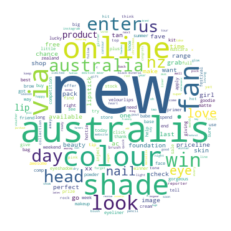

In [85]:
# keywords occurring throughout all of the posts
# added the background to white
# Question 3
#1200 #800
mask = np.array(Image.open(r"C:\Users\CINTHIA MIMBELA\mirror.jpg"))

wc = WordCloud(mask=mask, background_color='white', width=mask.shape[1], height=mask.shape[0], max_font_size=110, collocations=False).generate(text_all)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [74]:
# for alternative visualizations, extract the keyword counts
# https://stackoverflow.com/questions/60234036/python-word-count-from-wordcloud
kwords = WordCloud().process_text(text_all)
kwords

{'ummm': 1,
 'yum': 2,
 'ultimate': 6,
 'naughty': 3,
 'treat': 20,
 'click': 78,
 'worry': 7,
 'away': 16,
 'hair': 23,
 'colour': 106,
 'check': 135,
 'neat': 6,
 'list': 29,
 'babein': 14,
 'starlets': 1,
 'changed': 2,
 'tresses': 2,
 'worked': 1,
 'every': 31,
 'look': 236,
 'admit': 4,
 'scarlett': 2,
 'johansson': 1,
 'hot': 45,
 'matter': 4,
 'absolutely': 6,
 'bling': 2,
 'australis': 123,
 'hq': 1,
 'nothing': 11,
 'us': 119,
 'feel': 14,
 'quite': 2,
 'glamorous': 1,
 'make': 82,
 'enter': 52,
 'nicole': 6,
 'competition': 27,
 'three': 29,
 'win': 20,
 'online': 52,
 'store': 25,
 'voucher': 16,
 'jumbo': 3,
 'bronzer': 8,
 'know': 65,
 'want': 83,
 'p': 9,
 'blue': 17,
 'baby': 3,
 'love': 163,
 'matching': 10,
 'eye': 70,
 'manicure': 11,
 'prefer': 8,
 'mix': 24,
 'psst': 5,
 'two': 47,
 'comp': 53,
 'thought': 5,
 'awesome': 63,
 'excites': 1,
 'entry': 5,
 'form': 6,
 'new': 265,
 'product': 112,
 'introducing': 20,
 'hr': 1,
 'wear': 9,
 'super': 38,
 'eyeliner': 44,


In [75]:
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
df_kwords

,count
keyword,
ummm,1
yum,2
ultimate,6
naughty,3
treat,20
...,...
ac product,15
blend friend,5
blending tool,2


<AxesSubplot:xlabel='keyword'>

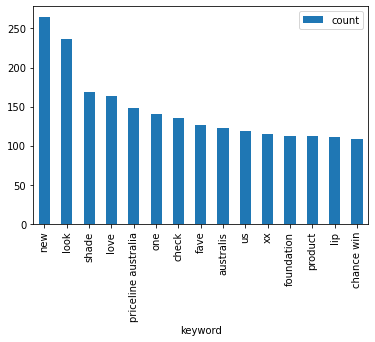

In [76]:
# plot a bar chart with the top-15 keywords
%matplotlib inline
df_kwords.sort_values(by='count', ascending=False).head(15).plot.bar()

In [77]:
# Showing the table with the top-15 keywords
df_kwords.sort_values(by='count', ascending=False).head(15)

,count
keyword,
new,265
look,236
shade,169
love,163
priceline australia,148
one,140
check,135
fave,127
australis,123


In [43]:
# it is comvenient to convert timestamps to datetime-format
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
# The time of the top-20 most commented posts 
tstamps = pd.to_datetime(df.sort_values(by='comments_count', ascending=False).head(20)['created_time'])
tstamps

1367   2014-09-24 19:30:00
1419   2014-12-03 19:30:01
1972   2016-10-16 17:00:00
1764   2016-01-29 13:10:31
1315   2014-08-11 18:35:00
1196   2014-06-10 16:45:01
1502   2015-03-12 18:00:01
1394   2014-10-27 20:00:00
1984   2016-10-30 16:45:00
1365   2014-09-19 16:30:01
958    2014-01-28 14:15:38
1370   2014-09-29 19:30:01
1715   2015-11-30 17:37:01
1900   2016-07-15 18:42:00
1423   2014-12-08 18:06:09
1203   2014-06-13 16:20:01
1385   2014-10-20 21:00:00
1893   2016-07-07 20:37:00
1822   2016-04-08 17:39:52
1883   2016-06-28 18:16:00
Name: created_time, dtype: datetime64[ns]

In [46]:
# The time of the top-20 most liked posts 
tstampsl = pd.to_datetime(df.sort_values(by='likes_count', ascending=False).head(20)['created_time'])
tstampsl

218    2012-11-12 16:09:18
27     2012-07-10 10:07:22
130    2012-09-19 11:23:15
209    2012-11-08 09:40:34
36     2012-07-16 17:15:59
17     2012-07-03 10:48:12
1764   2016-01-29 13:10:31
199    2012-11-01 17:53:15
22     2012-07-05 15:59:10
1893   2016-07-07 20:37:00
12     2012-06-28 16:52:25
1792   2016-03-02 12:00:00
1972   2016-10-16 17:00:00
44     2012-07-20 16:17:16
64     2012-08-06 12:01:57
16     2012-07-02 15:20:30
1      2012-06-21 15:09:46
540    2013-05-22 17:47:41
189    2012-10-25 16:54:47
160    2012-10-08 13:22:04
Name: created_time, dtype: datetime64[ns]

Text(0, 0.5, 'count')

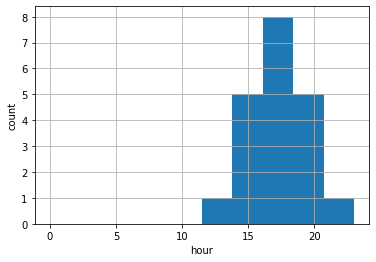

In [64]:
# Histogram of the hours for the top-20 most commented posts
# Question 4
hist_plot = tstamps.dt.hour.hist(range=[0, 23])
hist_plot.set_xlabel('hour')
hist_plot.set_ylabel('count')

Text(0, 0.5, 'count')

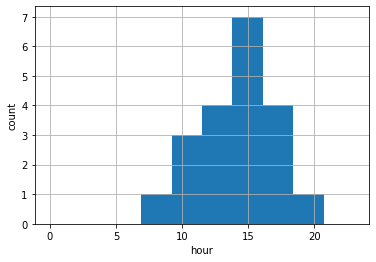

In [63]:
# Histogram of the hours for the top-20 most liked posts
hist_plot = tstampsl.dt.hour.hist(range=[0, 23])
hist_plot.set_xlabel('hour')
hist_plot.set_ylabel('count')

In [51]:
# The time of the top-10 most liked posts 
tstamps5 = pd.to_datetime(df.sort_values(by='likes_count', ascending=False).head(10)['created_time'])
tstamps5

218    2012-11-12 16:09:18
27     2012-07-10 10:07:22
130    2012-09-19 11:23:15
209    2012-11-08 09:40:34
36     2012-07-16 17:15:59
17     2012-07-03 10:48:12
1764   2016-01-29 13:10:31
199    2012-11-01 17:53:15
22     2012-07-05 15:59:10
1893   2016-07-07 20:37:00
Name: created_time, dtype: datetime64[ns]

Text(0, 0.5, 'count')

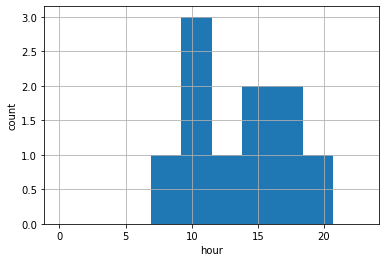

In [52]:
# Histogram of the hours for the top-20 most commented posts
# Question 5.1.
hist_plot = tstamps5.dt.hour.hist(range=[0, 23])
hist_plot.set_xlabel('hour')
hist_plot.set_ylabel('count')

In [54]:
# Clean message of the top-10 most liked posts
df.sort_values(by='likes_count', ascending=False).head(10)['message_clean']

218                                  us hit like agree xx
27                click wish brush collection looked like
130     apparently ryan gosling coming australia click...
209                       know way somewhere awesome life
36      us today seem super long click also think real...
17      hair idea today randomly braid tiny sections h...
1764                                                guess
199                                      true lovelies xx
22         click like know sleep sometimes way tired care
1893    well well well new toys way fans find range on...
Name: message_clean, dtype: object

In [55]:
# combine all post text entries
text_all5 = ' '.join(df.sort_values(by='likes_count', ascending=False).head(10)['message_clean'])

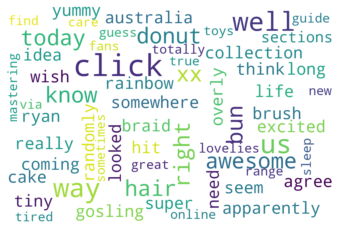

In [58]:
# keywords occurring throughout the top-10 most liked posts
# added the background to white
# Question 5.2.
wc5 = WordCloud(background_color='white', width=1200, height=800, max_font_size=110, collocations=False).generate(text_all5)
plt.axis("off")
plt.imshow(wc5, interpolation="bilinear")
plt.show()

In [59]:
kwords5 = WordCloud().process_text(text_all5)
kwords5

{'us': 3,
 'hit': 1,
 'agree': 1,
 'xx': 2,
 'click': 4,
 'wish': 1,
 'brush': 1,
 'collection': 1,
 'looked': 1,
 'apparently': 1,
 'ryan': 1,
 'gosling': 1,
 'coming': 1,
 'australia': 1,
 'right': 2,
 'overly': 1,
 'excited': 1,
 'know': 2,
 'way': 3,
 'somewhere': 1,
 'awesome': 2,
 'life': 1,
 'today': 2,
 'seem': 1,
 'super': 1,
 'long': 1,
 'think': 1,
 'really': 1,
 'need': 1,
 'yummy': 1,
 'rainbow': 1,
 'cake': 1,
 'hair': 2,
 'idea': 1,
 'randomly': 1,
 'braid': 1,
 'tiny': 1,
 'sections': 1,
 'totally': 1,
 'donut': 2,
 'bun': 2,
 'great': 1,
 'guide': 1,
 'mastering': 1,
 'guess': 1,
 'true': 1,
 'lovelies': 1,
 'sleep': 1,
 'sometimes': 1,
 'tired': 1,
 'care': 1,
 'well': 3,
 'new': 1,
 'toys': 1,
 'fans': 1,
 'find': 1,
 'range': 1,
 'online': 1,
 'via': 1}

In [60]:
# transform that dictionary into a pandas DataFrame
df_kwords5 = pd.DataFrame(list(kwords5.items()), columns=['keyword', 'count']).set_index('keyword')
df_kwords5

,count
keyword,
us,3
hit,1
agree,1
xx,2
click,4
wish,1
brush,1
collection,1
looked,1


<AxesSubplot:xlabel='keyword'>

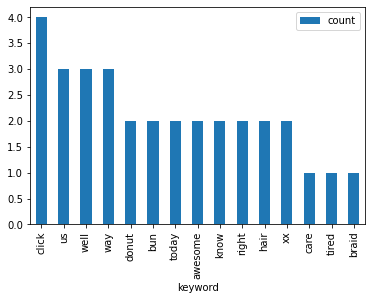

In [61]:
# plot a bar chart with the top keywords
%matplotlib inline
df_kwords5.sort_values(by='count', ascending=False).head(15).plot.bar()

In [62]:
# TABLE
df_kwords5.sort_values(by='count', ascending=False).head(15)

,count
keyword,
click,4
us,3
well,3
way,3
donut,2
bun,2
today,2
awesome,2
know,2
